In [ ]:
import torch
import random
from tqdm import tqdm
from torch.utils.data import Dataset
import math
import pandas as pd #only used for viewing the datset
import numpy as np

In [ ]:
class mandelbrotDataSet: 
    """
    
    
    this is the datset that the NN will be trained on!
    
    
    size = number of points to generate. Each point is generated uniformly at random.       
    max_depth = max nmber of steps to take when deciding whether a point belongs to the madelbrot set or not.    
    minimum_x = minimum value of x over all the generated points.
    maximum_x = maximum value of x over all the generated points.
    minimum_y = minimum value of y over all the generated points.
    maximum_y = maximum value of y over all the generated points.    
    
    """
    def __init__(self, size = 1000, max_depth = 50, minimum_x = -2.5, maximum_x = 1.0, minimum_y = -1.1, maximum_y = 1.1):
        self.minimum_x = minimum_x
        self.maximum_x = maximum_x

        self.minimum_y = minimum_y
        self.maximum_y = maximum_y

        self.size = size      
        self.max_depth = max_depth
        
        self.inputs = []
        self.outputs = []
        
        for i in tqdm(range(self.size)):
            x = random.uniform(minimum_x, maximum_x)
            y = random.uniform(minimum_y, maximum_y)
            self.inputs.append([x, y])
            self.outputs.append(np.array(self.belongs_to_mandelbrot_set(x, y)))            
            
    def belongs_to_mandelbrot_set(self, x, y): 
        """ Returns 1.0 if (x, y) is in the mandelbrot set. Else returns a float between 1 and 0 (excluding 1)"""
        return self.f(x + 1j * y) #Complex mumber
    
    def f(self, a):
        """ Itterates up to max depth to check if a complex number belongs to the madelbrot set or not."""
        z = 0
        for n in range(1, self.max_depth):
            z = z ** 2 + a
            if abs(z) > 2:
                return min((n - 1) / 50, 1)
        return 1.0  

    def get_X_and_Y(self):
      X_train_full = np.array(self.inputs)
      Y_train_full = []
      for output in self.outputs:
        if output == 1 or output == 1.0:
          Y_train_full.append(1)
        else:
          Y_train_full.append(0)

      return X_train_full, np.array(Y_train_full)
            
    def view(self):
        dataframe = pd.DataFrame(data = [], columns = ["x","y", "Belongs?"])
        for i in range(len(self.inputs)):
            inp = self.inputs[i]
            inp1 = inp[0]
            inp2 = inp[1]
            out = self.outputs[i]
            belongs = False
            if out == 1:
                belongs = True
                
            dataframe.loc[i] = [inp1, inp2, belongs]
        return dataframe       
            
                

In [ ]:
dataset = mandelbrotDataSet(100000) #by default we will generate 1000 training instances. 

100%|██████████| 100000/100000 [00:00<00:00, 156961.47it/s]


In [ ]:
X, Y = dataset.get_X_and_Y() 
X

array([[ 0.59145824, -0.75570509],
       [-1.80031288,  0.02464211],
       [ 0.18138745,  0.45894398],
       ...,
       [ 0.45578037,  0.87822897],
       [-1.07728428, -0.38622595],
       [-0.92758188, -0.3800153 ]])

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test = X[:math.ceil(X.shape[0] * 0.8)], X[math.ceil(X.shape[0] * 0.8):]
Y_train, Y_test = Y[:math.ceil(Y.shape[0] * 0.8)], Y[math.ceil(Y.shape[0] * 0.8):]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape  = [2, 1])) #each image array is 28 x 28 and each image array is input, and flatten it. 
model.add(keras.layers.Dense(300, activation = "relu")) #fukly conencted layer with 300 neurons. using relu activation function. = 300 * (28 * 28) weights and 300 biases
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(2, activation = "softmax")) #output layer has 10 neurons because 10 classes. 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 300)               900       
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 31,202
Trainable params: 31,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"]) #learwning rate defaults to 0.01

In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, validation_data = (X_test, Y_test))

Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.3245 - accuracy: 0.8408 - val_loss: 0.2093 - val_accuracy: 0.9297
Epoch 2/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1601 - accuracy: 0.9467 - val_loss: 0.1235 - val_accuracy: 0.9595
Epoch 3/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1104 - accuracy: 0.9604 - val_loss: 0.0979 - val_accuracy: 0.9643
Epoch 4/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0941 - accuracy: 0.9635 - val_loss: 0.0881 - val_accuracy: 0.9661
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0872 - accuracy: 0.9646 - val_loss: 0.0837 - val_accuracy: 0.9668
Epoch 6/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0837 - accuracy: 0.9656 - val_loss: 0.0816 - val_accuracy: 0.9662
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0817 - accuracy: 0.9661 - val_loss: 0.0794 - val_accuracy:

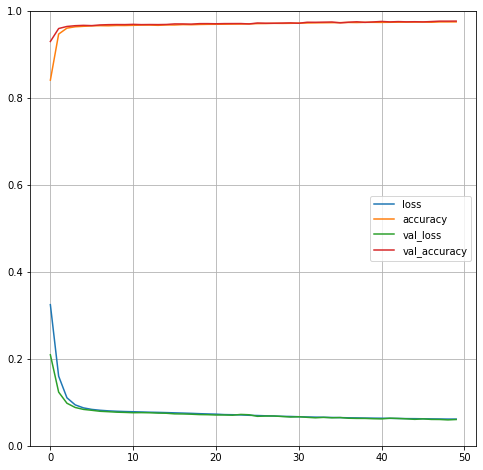

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 8))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model.evaluate(X_test, Y_test) # returns (loss, accuracy)

625/625 [==============================] - 1s 905us/step - loss: 0.0604 - accuracy: 0.9766


[0.060429882258176804, 0.9765999913215637]

In [ ]:
n = 1000
new_dataset = dataset = mandelbrotDataSet(n) 
X, Y = dataset.get_X_and_Y()

predictions = model.predict(X)
predictions_as_classes = np.argmax(predictions, axis=1)
predictions_as_classes

100%|██████████| 1000/1000 [00:00<00:00, 124334.62it/s]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
def create_initially_empty_matrix(dataset):
  return np.zeros((dataset.size, round(dataset.size / (dataset.maximum_x - dataset.minimum_x) * (dataset.maximum_y - dataset.minimum_y))))



def get_matrix_to_draw(empty_matrix, dataset, predictions):
  xpixels = dataset.size
  ypixels = round(xpixels / (dataset.maximum_x - dataset.minimum_x) * (dataset.maximum_y - dataset.minimum_y))

  input_data, Y = dataset.get_X_and_Y()
  prediction_index = 0
  for item in input_data: 
    x, y = item[0], item[1]
    if predictions[prediction_index] == 1:
       empty_matrix[x][y] = 1
    else:
      empty_matrix[x][y] = 0
   
  return empty_matrix

  


empty_matrix = create_initially_empty_matrix(dataset)

matrix_for_drawing = get_matrix_to_draw(empty_matrix, dataset, predictions_as_classes)
matrix_for_drawing


IndexError: ignored